In [9]:
import import_ipynb
import player as P
import pygame
import sys
import time

## PLAY AGAINST

In [10]:
def playoff(bot_white,bot_black):
    WIDTH, HEIGHT = 600, 600
    GRID_SIZE = 8
    CELL_SIZE = WIDTH // GRID_SIZE
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 128, 0)
    # Initialize the game board
    board = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    board[3][4] = board[4][3] = 2  # White
    board[3][3] = board[4][4] = 1  # Black
    # Current player (1 for White, 2 for Black)
    # Initialize Pygame
    # # Create the game window

    # pygame.init()
    # pygame.font.init() 
    # my_font = pygame.font.SysFont('Comic Sans MS', 10)

    # screen = pygame.display.set_mode((WIDTH, HEIGHT))
    # pygame.display.set_caption("8x8 Othello")

    # def draw_board():
    #     screen.fill(GREEN)
    #     for x in range(GRID_SIZE):
    #         for y in range(GRID_SIZE):
    #             pygame.draw.rect(screen, BLACK, (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE), 1)
    #             if board[y][x] == 1:
    #                 pygame.draw.circle(screen, WHITE, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), CELL_SIZE//2 - 5)
    #             elif board[y][x] == 2:
    #                 pygame.draw.circle(screen, BLACK, (x*CELL_SIZE + CELL_SIZE//2, y*CELL_SIZE + CELL_SIZE//2), CELL_SIZE//2 - 5)

    flag = 1
    current_player = 2
    while flag:
        
        flag = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if P.is_valid_move(x,y,board,current_player): flag=1

        if current_player == 1 and flag:
            x,y = bot_white.get_move(board,current_player)    
            if P.is_valid_move(x, y,board,current_player):
                P.make_move(x,y,board,current_player)
            current_player = 2
        
        elif current_player == 2 and flag:
            
            grid_x,grid_y = bot_black.get_move(board,current_player)
            if P.is_valid_move(grid_x, grid_y,board,current_player):
                P.make_move(grid_x, grid_y,board,current_player)
                current_player = 1

        # Quit = False
        # for event in pygame.event.get():
        #     if event.type == pygame.QUIT:
        #         Quit = True    
        # if(Quit): break

        if not flag:
            wins = P.decide_winner(board,current_player)
     
    #     draw_board()
    #     pygame.display.flip()
    # pygame.quit()
    return wins



In [11]:
mcts1 = P.MCTSPlayer(explorationFactor=1,rollouts=300,selectionDepth=2)
mcts15 = P.MCTSPlayer(explorationFactor=1.5,rollouts=300,selectionDepth=2)
alpha2 = P.AlphaBetaPlayer(depth = 2)
alpha3 = P.AlphaBetaPlayer(depth = 3)
rando = P.RandomPlayer()

In [12]:
players = [mcts1,mcts15,alpha2,alpha3,rando]
elo = [1200 for x in players]

def match(idxWhite,idxBlack):
    E_w = 1/(1 + 10**((elo[idxBlack] - elo[idxWhite])/400))
    E_b = 1/(1 + 10**((elo[idxWhite] - elo[idxBlack])/400))

    blackWin = playoff(bot_white = players[idxWhite],bot_black = players[idxBlack])

    if(blackWin):
        elo[idxBlack] = elo[idxBlack] + 32*(1 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(0 - E_b)
    else:
        elo[idxBlack] = elo[idxBlack] + 32*(0 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(1 - E_b)

In [13]:
print(elo)

[1200, 1200, 1200, 1200, 1200]


5
....................[1275.100923407872, 1310.0977702104642, 1163.668695930907, 1159.2787049445342, 1091.8539055062226]
....................[1382.3559554085782, 1474.6604598449908, 1031.8700637918355, 1064.2602080136835, 1046.853312940912]
....................[1551.0521973742068, 1665.303794854509, 934.173710471723, 987.2927033703194, 862.1775939292418]
....................[1734.7502583474254, 1828.7527792837682, 800.8253376605638, 951.3853466234378, 684.2862780848047]
....................[1923.0050815296308, 2023.4916158607437, 696.7786972628304, 894.7164906051429, 462.00811474165255]


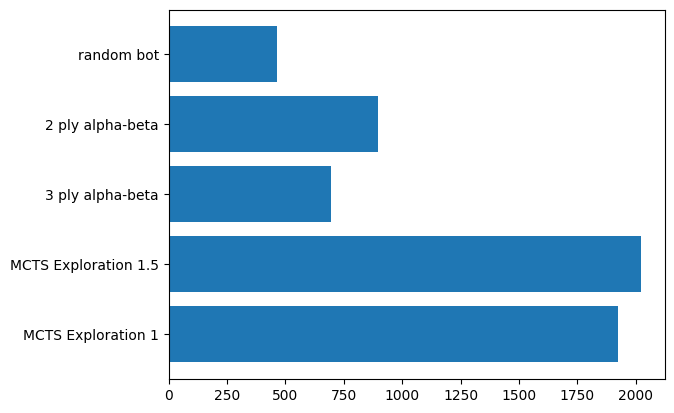

In [14]:
import matplotlib.pyplot as plt
players = [mcts1,mcts15,alpha2,alpha3,rando]
elo = [1200 for x in players]

n = len(elo)
print(n)
for x in range(5):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

plt.barh([
     "MCTS Exploration 1",
     "MCTS Exploration 1.5",
     "3 ply alpha-beta",
     "2 ply alpha-beta",
     "random bot"
     ],elo)

plt.show()